In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd
import time
import seaborn as sb

In [2]:
# Set Pandas to display more columns as default
pd.options.display.max_columns=30

In [3]:
def read_data_from_pickle(file_name, sort = True, by_column = 'dim_user_gid'): 
    
    data = pd.read_pickle(file_name)
    data["dim_user_gid"].astype(int)

    print("\nA short summary of the uploaded file:")
    print("The data was loaded into a data-frame.")
    print("There are {} different rows, and {} different columns.".format(data.shape[0], data.shape[1]))
    print("There are {} unique values at the dim_user_gid column.".format(data['dim_user_gid'].nunique()))
    print("There are {} *nan* values at the dim_user_gid column.".format(data['dim_user_gid'].isnull().sum()))

    if sort:
        data = data.sort_values(by = ["dim_user_gid"])
        print("The data-frame was sorted by the dim_user_gid column.\n")
    
    return data

# Bingo Blitz data - raw features set


### Available user properties + info for each

#### General comment: 
For data sets that span a long period of time (months, years), it is assumed that the criterions for a given feature are updated retroactively. For example, if the definition of the level brackets update, all users are re-cast into the new level brackets, even those that haven't played the app from before the new definition took place.  


- **top_platform**:
    - Nominal variable 
    - 7 different categories
    - Zero value at a given category are informative
    
- **level**: 
    - Numerical, discrete variable
    - Values from 1 to maximal level a user in a specific set achieved
    - No zero values (as any user begins with at least level 1)
    
- **trstier**:
    - Ordinal variable
    - Values of 1 to 7
    - No zero values (as any user begins with at least tier 1)
    
- **level_bracket**: 
    - Ordinal variable 
    - There are ten different brackets (can transform them from strings to values of 1 to 10 for simplicity purposes)
    - No zero values (as any user begins with at least the lowest level bracket of lv_01_07)
    
- **is_elite**:
    - Ordinal variable 
    - Two different values
    - Zero value at a given category are informative (e.g., it could be that at a given data-set no users are in the elite category) 
    
- **is_vip**:
    - Ordinal variable 
    - Two different values
    - Zero value at a given category are informative (e.g., it could be that at a given data-set no users are in the elite category) 
    
- **llrecency** (the last time the user was seen):
    - Numerical, discrete variable 
    - Values from 1 to the maximal recency of the users in the specific data set 
    - No zero values (each user has a value, with the minimal one being 1, that is, that user has been seen the day before the data set refers to)
    
- **Lifetime_Revenue_Net**:
    - Numerical, continous variable
    - Majority of values are zero, all are informative
    
- **Last_30D_Revenue_Net**:
    - Numerical, continous variable
    - Majority of values are zero, of which only those for users with recency <= 30 are informative
    
- **Last_90D_Revenue_Net**:
    - Numerical, continous variable
    - Majority of values are zero, of which only those for users with recency <= 90 are informative
    
- **Last_30D_Transactions**:
    - Numerical, discrete variable 
    - Values from 0 to 30
    - Majority of values are zero, of which only those for users with recency <= 30 are informative

- **Last_30D_Gross_Sink**:
    - Numerical, continous variable
    - Majority of values are zero, of which only those for users with recency <= 30 are informative

- **Last_90D_Gross_Sink**:
    - Numerical, continous variable
    - Majority of values are zero, of which only those for users with recency <= 90 are informative
    
- **Life_Time_Login_Days**:
    - Numerical, discrete variable 
    - Values from 0 to 4000 
    - No zeros (at least 1 login day for each user)

- **Last_30D_Login_days**:
    - Numerical, discrete variable 
    - Values from 0 to 30
    - Majority of values are zero, informative
    
- **Last_90D_Login_days**:
    - Numerical, discrete variable 
    - Values from 0 to 90
    - Majority of values are zero, informative
    
- **credits_balance_EOD**:
    - Numerical, continous variable (it is in fact a discrete variable, but as it spans such a wide range of values, it can be considered as continous)
    - Almost no zero values.
    
- **coins_balance_EOD**: 
    - Numerical, continous variable (it is in fact a discrete variable, but as it spans such a wide range of values, it can be considered as continous)
    - Almost no zero values.

- **number_of_bingo_rounds**:
    - Numerical, discrete variable 
    - Values from 0 to 433
    - Majority of values are zero, informative 
      
- **total_rounds_mode_1**:
    - Numerical, discrete variable 
    - Values from 0 to ca. 300 
    - Majority of values are zero, informative 
      
- **total_rounds_mode_2**:
    - Numerical, discrete variable 
    - Values from 0 to ca. 300 
    - Majority of values are zero, informative 

- **total_rounds_mode_3**:
    - Numerical, discrete variable 
    - Values from 0 to ca. 300 
    - Majority of values are zero, informative 

- **total_rounds_mode_4**:
    - Numerical, discrete variable 
    - Values from 0 to ca. 300 
    - Majority of values are zero, informative 

- **total_rounds_mode_5**:
    - Numerical, discrete variable 
    - Values from 0 to ca. 300
    - Majority of values are zero, informative 

- **total_rounds_mode_6**:
    - Numerical, discrete variable 
    - Values from 0 to ca. 300 
    - Majority of values are zero, informative 

In [94]:
recency_30D_features = ['Last_30D_Revenue_Net', 'Last_30D_Transactions', 'Last_30D_Gross_Sink']
recency_90D_features = ['Last_90D_Revenue_Net', 'Last_90D_Gross_Sink']

recency_dependent_features = {}
recency_dependent_features.update({'30D': recency_30D_features})
recency_dependent_features.update({'90D': recency_90D_features})

## Loading the data and important cleaning steps

In [4]:
# # Data with 1 million users
# file_name = "Data/data_features_1_million_users_20220915.pkl"

# Data with 5 million users
file_name = "Data/data_features_5_million_users_20220915.pkl"

In [5]:
data_for_clustering = read_data_from_pickle(file_name)
data_for_clustering.head(10)


A short summary of the uploaded file:
The data was loaded into a data-frame.
There are 5000000 different rows, and 26 different columns.
There are 5000000 unique values at the dim_user_gid column.
There are 0 *nan* values at the dim_user_gid column.
The data-frame was sorted by the dim_user_gid column.



,dim_user_gid,top_platform,level,trstier,level_bracket,is_elite,is_vip,llrecency,Lifetime_Revenue_Net,Last_30D_Revenue_Net,Last_90D_Revenue_Net,Last_30D_Transactions,Last_30D_Gross_Sink,Last_90D_Gross_Sink,Last_30D_Login_days,Last_90D_Login_days,credits_balance_EOD,coins_balance_EOD,number_of_bingo_rounds,Life_Time_Login_Days,total_rounds_mode_1,total_rounds_mode_2,total_rounds_mode_3,total_rounds_mode_4,total_rounds_mode_5,total_rounds_mode_6
23899,261,Apple,74.0,2.0,lv_40_79,0,0,4,0.0000,0.0000,0.0000,0,42.0000,42.0000,2,2,23992.0,989739.0,0,72,0,0,0,0,0,0
40151,288,Google,77.0,1.0,lv_40_79,0,0,1,0.0000,0.0000,0.0000,0,0.0000,0.0000,6,17,591.0,129887.0,0,66,0,0,0,0,0,0
40152,312,Google,97.0,1.0,lv_80_119,0,0,1,0.0000,0.0000,0.0000,0,16952.0000,53355.0000,29,89,279.0,485502.0,10,136,0,0,5,0,0,0
40153,376,Google,126.0,3.0,lv_120_139,0,0,10,85.1555,0.0000,10.4930,0,0.0000,2652.0000,1,7,2278.0,2863137.0,0,306,0,0,0,0,0,0
68592,381,Google,129.0,2.0,lv_120_139,0,0,1,110.9604,0.0000,10.4930,0,450.0000,25135.0000,10,36,5698.0,1277645.0,0,307,0,0,0,0,0,0
80781,388,Apple,85.0,2.0,lv_80_119,0,0,121,3.8430,0.0000,0.0000,0,0.0000,0.0000,0,0,1414.0,4238.0,0,109,0,0,0,0,0,0
48277,391,Web,243.0,2.0,lv_200plus,0,0,1,0.0000,0.0000,0.0000,0,11580.0000,34815.0000,30,90,4.0,4128.0,5,2480,5,0,0,0,0,0
3584,427,Facebook,208.0,3.0,lv_200plus,0,0,1,0.0000,0.0000,0.0000,0,21180.0000,238137.0000,27,87,426.0,9904.0,5,1164,0,0,0,0,0,0
48278,436,Facebook,72.0,2.0,lv_40_79,0,0,41,0.0000,0.0000,0.0000,0,0.0000,772.0000,0,1,204.0,342700.0,0,165,0,0,0,0,0,0
68593,454,Google,64.0,2.0,lv_40_79,0,0,49,0.0000,0.0000,0.0000,0,0.0000,1944.0000,0,1,207.0,25913.0,0,66,0,0,0,0,0,0


In [6]:
# Casting the numerical variables that are registered as 'object' into a float type
data_for_clustering['Lifetime_Revenue_Net'] = data_for_clustering['Lifetime_Revenue_Net'].astype(float)
data_for_clustering['Last_30D_Revenue_Net'] = data_for_clustering['Last_30D_Revenue_Net'].astype(float)
data_for_clustering['Last_90D_Revenue_Net'] = data_for_clustering['Last_90D_Revenue_Net'].astype(float)
data_for_clustering['Last_30D_Gross_Sink'] = data_for_clustering['Last_30D_Gross_Sink'].astype(float)
data_for_clustering['Last_90D_Gross_Sink'] = data_for_clustering['Last_90D_Gross_Sink'].astype(float)

data_for_clustering.dtypes

dim_user_gid                int64
top_platform               object
level                     float64
trstier                   float64
level_bracket              object
is_elite                    int64
is_vip                      int64
llrecency                   int64
Lifetime_Revenue_Net      float64
Last_30D_Revenue_Net      float64
Last_90D_Revenue_Net      float64
Last_30D_Transactions       int64
Last_30D_Gross_Sink       float64
Last_90D_Gross_Sink       float64
Last_30D_Login_days         int64
Last_90D_Login_days         int64
credits_balance_EOD       float64
coins_balance_EOD         float64
number_of_bingo_rounds      int64
Life_Time_Login_Days        int64
total_rounds_mode_1         int64
total_rounds_mode_2         int64
total_rounds_mode_3         int64
total_rounds_mode_4         int64
total_rounds_mode_5         int64
total_rounds_mode_6         int64
dtype: object

In [7]:
# Finding if there are null values at any of the columns
columns_with_nan = data_for_clustering.columns[data_for_clustering.isna().any()].tolist()
print(columns_with_nan)

['level', 'trstier', 'credits_balance_EOD', 'coins_balance_EOD']


In [8]:
# Finding how many nan values are there in the columns with such values:  
for col in columns_with_nan:
    print("There are {} nan values in the column {}.\n".format(data_for_clustering[col].isnull().sum(), col))

There are 8432 nan values in the column level.

There are 20 nan values in the column trstier.

There are 6218 nan values in the column credits_balance_EOD.

There are 6256 nan values in the column coins_balance_EOD.



In [9]:
# Finding how many rows has at least one nan value:
print(len(data_for_clustering) - len(data_for_clustering.dropna()))

14703


In [10]:
# As there are only ca. 15k lines, out of a total of 5000k lines, with nan values, and as the number of users 
# that are in both the raw data set and the targets sets is not decreased by too much when this rows are dropped, 
# I will just drop these lines with the nan values for now (instead of doing something more specific, like fill
# cells with nan with some mean value, etc.)
data_for_clustering.dropna(inplace = True)
data_for_clustering.shape

(4985297, 26)

## Setting the mathematical data type of each column

In [11]:
columns_names = data_for_clustering.columns.tolist()
columns_names.remove('dim_user_gid')

columns_math_data_types = {}
for column in columns_names:
    columns_math_data_types.update({column: ''})

In [12]:
columns_math_data_types.update({'top_platform': 'Nominal'})
columns_math_data_types.update({'level': 'Numerical'})
columns_math_data_types.update({'trstier': 'Ordinal'})
columns_math_data_types.update({'level_bracket': 'Ordinal'})
columns_math_data_types.update({'is_elite': 'Ordinal'})
columns_math_data_types.update({'is_vip': 'Ordinal'})

columns_math_data_types.update({'llrecency': 'Numerical'})
columns_math_data_types.update({'Lifetime_Revenue_Net': 'Numerical'})
columns_math_data_types.update({'Last_30D_Revenue_Net': 'Numerical'})
columns_math_data_types.update({'Last_90D_Revenue_Net': 'Numerical'})
columns_math_data_types.update({'Last_30D_Transactions': 'Numerical'})
columns_math_data_types.update({'Last_30D_Gross_Sink': 'Numerical'})

columns_math_data_types.update({'Last_90D_Gross_Sink': 'Numerical'})
columns_math_data_types.update({'Last_30D_Login_days': 'Numerical'})
columns_math_data_types.update({'Last_90D_Login_days': 'Numerical'})
columns_math_data_types.update({'credits_balance_EOD': 'Numerical'})
columns_math_data_types.update({'coins_balance_EOD': 'Numerical'})
columns_math_data_types.update({'number_of_bingo_rounds': 'Numerical'})

columns_math_data_types.update({'Life_Time_Login_Days': 'Numerical'})
columns_math_data_types.update({'total_rounds_mode_1': 'Numerical'})
columns_math_data_types.update({'total_rounds_mode_2': 'Numerical'})
columns_math_data_types.update({'total_rounds_mode_3': 'Numerical'})
columns_math_data_types.update({'total_rounds_mode_4': 'Numerical'})
columns_math_data_types.update({'total_rounds_mode_5': 'Numerical'})
columns_math_data_types.update({'total_rounds_mode_6': 'Numerical'})

columns_math_data_types

{'top_platform': 'Nominal',
 'level': 'Numerical',
 'trstier': 'Ordinal',
 'level_bracket': 'Ordinal',
 'is_elite': 'Ordinal',
 'is_vip': 'Ordinal',
 'llrecency': 'Numerical',
 'Lifetime_Revenue_Net': 'Numerical',
 'Last_30D_Revenue_Net': 'Numerical',
 'Last_90D_Revenue_Net': 'Numerical',
 'Last_30D_Transactions': 'Numerical',
 'Last_30D_Gross_Sink': 'Numerical',
 'Last_90D_Gross_Sink': 'Numerical',
 'Last_30D_Login_days': 'Numerical',
 'Last_90D_Login_days': 'Numerical',
 'credits_balance_EOD': 'Numerical',
 'coins_balance_EOD': 'Numerical',
 'number_of_bingo_rounds': 'Numerical',
 'Life_Time_Login_Days': 'Numerical',
 'total_rounds_mode_1': 'Numerical',
 'total_rounds_mode_2': 'Numerical',
 'total_rounds_mode_3': 'Numerical',
 'total_rounds_mode_4': 'Numerical',
 'total_rounds_mode_5': 'Numerical',
 'total_rounds_mode_6': 'Numerical'}

## How many zeros and overlapping zeros are there

In [13]:
# Dropping the columns that are categorical, binary, or ordinal discrete 
df_for_zero_counts = data_for_clustering.drop(['Life_Time_Login_Days'], axis = 1)
df_for_zero_counts.drop(df_for_zero_counts.iloc[:, 0:8], inplace=True, axis=1)
print(df_for_zero_counts.shape)
df_for_zero_counts.head(5)

(4985297, 17)


,Lifetime_Revenue_Net,Last_30D_Revenue_Net,Last_90D_Revenue_Net,Last_30D_Transactions,Last_30D_Gross_Sink,Last_90D_Gross_Sink,Last_30D_Login_days,Last_90D_Login_days,credits_balance_EOD,coins_balance_EOD,number_of_bingo_rounds,total_rounds_mode_1,total_rounds_mode_2,total_rounds_mode_3,total_rounds_mode_4,total_rounds_mode_5,total_rounds_mode_6
23899,0.0000,0.0,0.000,0,42.0,42.0,2,2,23992.0,989739.0,0,0,0,0,0,0,0
40151,0.0000,0.0,0.000,0,0.0,0.0,6,17,591.0,129887.0,0,0,0,0,0,0,0
40152,0.0000,0.0,0.000,0,16952.0,53355.0,29,89,279.0,485502.0,10,0,0,5,0,0,0
40153,85.1555,0.0,10.493,0,0.0,2652.0,1,7,2278.0,2863137.0,0,0,0,0,0,0,0
68592,110.9604,0.0,10.493,0,450.0,25135.0,10,36,5698.0,1277645.0,0,0,0,0,0,0,0


In [14]:
num_of_users = df_for_zero_counts.shape[0]
zeros = []
for column in df_for_zero_counts:
    zeros.append(len(df_for_zero_counts[df_for_zero_counts[column] == 0]))
    print("\nThere are {} *zeros* at the column {}.".format(zeros[-1], column))
    print("This is {:.2f}% of the users in the list.\n".format(zeros[-1]/num_of_users*100))


There are 4190866 *zeros* at the column Lifetime_Revenue_Net.
This is 84.06% of the users in the list.


There are 4723048 *zeros* at the column Last_30D_Revenue_Net.
This is 94.74% of the users in the list.


There are 4619599 *zeros* at the column Last_90D_Revenue_Net.
This is 92.66% of the users in the list.


There are 4723046 *zeros* at the column Last_30D_Transactions.
This is 94.74% of the users in the list.


There are 3667571 *zeros* at the column Last_30D_Gross_Sink.
This is 73.57% of the users in the list.


There are 3161994 *zeros* at the column Last_90D_Gross_Sink.
This is 63.43% of the users in the list.


There are 3482986 *zeros* at the column Last_30D_Login_days.
This is 69.87% of the users in the list.


There are 2865639 *zeros* at the column Last_90D_Login_days.
This is 57.48% of the users in the list.


There are 34954 *zeros* at the column credits_balance_EOD.
This is 0.70% of the users in the list.


There are 591 *zeros* at the column coins_balance_EOD.
This i

In [15]:
mat_zeros_overlap_count = np.zeros([df_for_zero_counts.shape[1], df_for_zero_counts.shape[1]])

for column_i in df_for_zero_counts:
    i = df_for_zero_counts.columns.get_loc(column_i)
    for column_j in df_for_zero_counts:
        j = df_for_zero_counts.columns.get_loc(column_j)
        mat_zeros_overlap_count[i][j] = len(df_for_zero_counts.query('{} == 0 and {} == 0'.format(column_i, column_j)))/df_for_zero_counts.shape[0]

In [16]:
zeros_asarray = np.asarray([ele/df_for_zero_counts.shape[0] for ele in zeros])
zeros_asarray = zeros_asarray.reshape(len(zeros_asarray), 1)

In [17]:
columns_names = df_for_zero_counts.columns.tolist()

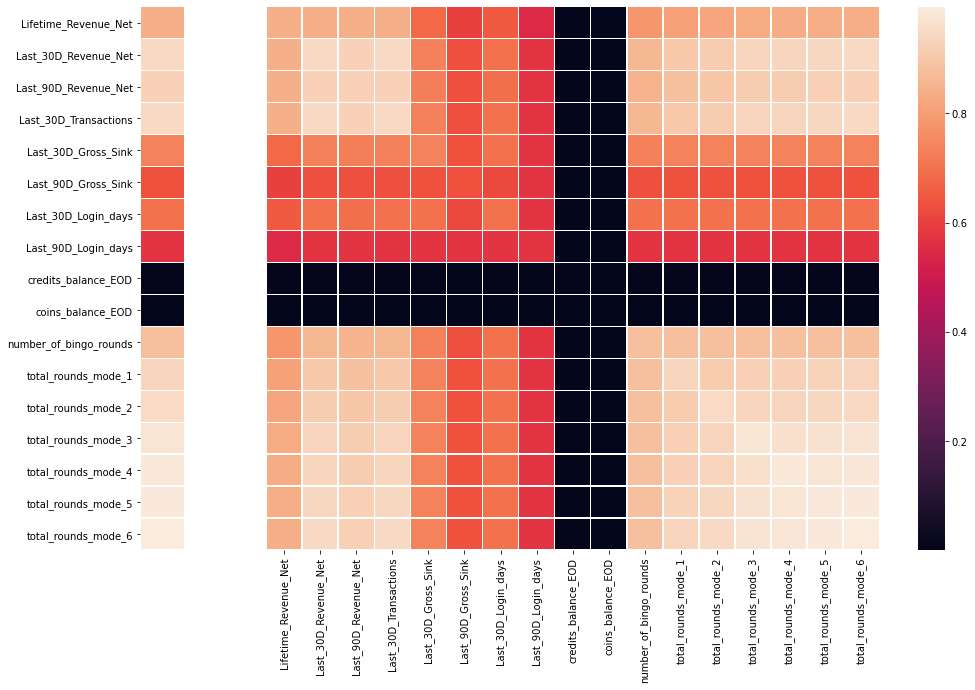

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 10), gridspec_kw={'width_ratios': [1, 17]})
sb.heatmap(zeros_asarray, linewidths=.5, cbar=False, yticklabels = columns_names, xticklabels = [], ax = ax1)
sb.heatmap(mat_zeros_overlap_count, linewidths=.5, xticklabels = columns_names, yticklabels = [], ax = ax2)
plt.show()

#### Overlapping Zeros - how many users with a zero value in one column also has a zero value in another column
1. The left subplot depicts the ratio of zeros in each column (number of zeros in the column / overall number of users). In most of these columns, the ratio is quite high. 
2. On the right is the ratio of overlapping zeros in any pair of columns (y-lables are as in left subplot) to the overall number of users. Almost all zeros are overlapping, and it is only bounded by the column with least zeros (that is, in the 'credit_balance_EOD' column there are only 590 zero values, while in the 'total_rounds_mode_6' almost all users have a zero value, and so the max number of users with zeros in both columns will be 590).  

The issue is relevant for the correlation section below. That is, if the zeros at both features the correlation is calculated for is because of the users behavior, then it is Ok. But if the zeros in one of the features is because of underlying reason that is not user-behavior related, then the correlation (that will stems from have co-occurances of zeros) will be meaningless. 

#### Paper about estimating correlations in the presence of zeros in the data

The paper "Performance of Some Correlation Coefficients When Applied to Zero-Clustered Data" (found [here](https://digitalcommons.wayne.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=1101&context=jmasm)) discusses the impact of zeros on the estimation of the correlation coefficient by considering simulated data sets (created from different distributions) and different approaches for calculating the correlation.   
Main conclusion: They find that using Pearson and Spearman approaches leads to minor under-estimation of the actual correlation.  
To note, the ratio of zeros they tested were 0.1 to 0.3, while in our case, the ratio can be as high as 0.9 and above. 

## Correlations between the different features

In [73]:
def calc_corr_and_significance(data, tests, drop_zero = True):
       
    correlations = np.zeros([data.shape[1], data.shape[1]])
    p_values = np.zeros([data.shape[1], data.shape[1]])
    
    correlations_zeros_dropped = np.zeros([data.shape[1], data.shape[1]])
    p_values_zeros_dropped = np.zeros([data.shape[1], data.shape[1]])

    total_tests = (data.shape[1])*(data.shape[1])
    test_num = 0
    for column_i in data:
        i = data.columns.get_loc(column_i)
        for column_j in data:
            print("Running correlations on {} with {}".format(column_i, column_j))
            j = data.columns.get_loc(column_j) 
            
            
            if tests[column_i][column_j] == 'Pearson':
                print('Running Pearson on full data')
                r, p = stats.pearsonr(data[column_i], data[column_j])

            # If not Pearson or Spearman, running the Kendall test: 
            elif tests[column_i][column_j] == 'Kendall': 
                print('Running Kendall on full data')
                r, p = stats.kendalltau(data[column_i], data[column_j])

            else: 
                # Add an error message here
                pass
            
            df_zero_dropped = data[[column_i, column_j]]
            df_zero_dropped = df_zero_dropped[~(df_zero_dropped == 0).any(axis=1)]
            if check_normality(df_zero_dropped[column_i]) == 'normal' and check_normality(df_zero_dropped[column_j]) == 'normal':
                print('Running Pearson on dropped zero')
                r_dropped_zero, p_dropped_zero = stats.pearsonr(df_zero_dropped[column_i], df_zero_dropped[column_j])
            else:
                print('Running Kendall on dropped zero')
                r_zeros_dropped, p_zeros_dropped = stats.kendalltau(df_zero_dropped[column_i], df_zero_dropped[column_j])

            test_num += 1
            print('Finished {} out of {} correlation estimations.'.format(test_num, total_tests))
            
            correlations[i][j] = r
            p_values[i][j] = p
            correlations_zeros_dropped[i][j] = r_zeros_dropped
            p_values_zeros_dropped[i][j] = p_zeros_dropped            
            
    return correlations, p_values, correlations_zeros_dropped, p_values_zeros_dropped

In [54]:
def check_normality(data):
    
    shapiro_test = stats.shapiro(data)
    if shapiro_test.pvalue <= 0.05:
        result = 'not-normal'
    else: 
        results = 'normal'
        
    return result

In [86]:
numerical_columns = [column for column in data_for_clustering.columns if column != 'dim_user_gid' and columns_math_data_types[column] == 'Numerical']
data_numerical = data_for_clustering[numerical_columns]
data_numerical.shape
data_numerical.head()

,level,llrecency,Lifetime_Revenue_Net,Last_30D_Revenue_Net,Last_90D_Revenue_Net,Last_30D_Transactions,Last_30D_Gross_Sink,Last_90D_Gross_Sink,Last_30D_Login_days,Last_90D_Login_days,credits_balance_EOD,coins_balance_EOD,number_of_bingo_rounds,Life_Time_Login_Days,total_rounds_mode_1,total_rounds_mode_2,total_rounds_mode_3,total_rounds_mode_4,total_rounds_mode_5,total_rounds_mode_6
23899,74.0,4,0.0000,0.0,0.000,0,42.0,42.0,2,2,23992.0,989739.0,0,72,0,0,0,0,0,0
40151,77.0,1,0.0000,0.0,0.000,0,0.0,0.0,6,17,591.0,129887.0,0,66,0,0,0,0,0,0
40152,97.0,1,0.0000,0.0,0.000,0,16952.0,53355.0,29,89,279.0,485502.0,10,136,0,0,5,0,0,0
40153,126.0,10,85.1555,0.0,10.493,0,0.0,2652.0,1,7,2278.0,2863137.0,0,306,0,0,0,0,0,0
68592,129.0,1,110.9604,0.0,10.493,0,450.0,25135.0,10,36,5698.0,1277645.0,0,307,0,0,0,0,0,0


In [55]:
normality = {}
for column in data_for_clustering.columns:
    if column != 'dim_user_gid':
        if columns_math_data_types[column] == 'Numerical':
            result = check_normality(data_for_clustering[column])
            normality.update({column: result})

In [57]:
normality

{'level': 'not-normal',
 'llrecency': 'not-normal',
 'Lifetime_Revenue_Net': 'not-normal',
 'Last_30D_Revenue_Net': 'not-normal',
 'Last_90D_Revenue_Net': 'not-normal',
 'Last_30D_Transactions': 'not-normal',
 'Last_30D_Gross_Sink': 'not-normal',
 'Last_90D_Gross_Sink': 'not-normal',
 'Last_30D_Login_days': 'not-normal',
 'Last_90D_Login_days': 'not-normal',
 'credits_balance_EOD': 'not-normal',
 'coins_balance_EOD': 'not-normal',
 'number_of_bingo_rounds': 'not-normal',
 'Life_Time_Login_Days': 'not-normal',
 'total_rounds_mode_1': 'not-normal',
 'total_rounds_mode_2': 'not-normal',
 'total_rounds_mode_3': 'not-normal',
 'total_rounds_mode_4': 'not-normal',
 'total_rounds_mode_5': 'not-normal',
 'total_rounds_mode_6': 'not-normal'}

In [90]:
# Choosing which correlation test to run for which pair of inputs
tests = {}
for column_i in data_numerical:
    tests.update({column_i: {}})
    for column_j in data_numerical:
        if columns_math_data_types[column_i] == 'Numerical':
            if columns_math_data_types[column_j] == 'Numerical':
                if normality[column_i] == 'normal' and normality [column_j] == 'normal':
                    tests[column_i].update({column_j: 'Pearson'})
                else:
                    tests[column_i].update({column_j: 'Kendall'})

tests

{'level': {'level': 'Kendall',
  'llrecency': 'Kendall',
  'Lifetime_Revenue_Net': 'Kendall',
  'Last_30D_Revenue_Net': 'Kendall',
  'Last_90D_Revenue_Net': 'Kendall',
  'Last_30D_Transactions': 'Kendall',
  'Last_30D_Gross_Sink': 'Kendall',
  'Last_90D_Gross_Sink': 'Kendall',
  'Last_30D_Login_days': 'Kendall',
  'Last_90D_Login_days': 'Kendall',
  'credits_balance_EOD': 'Kendall',
  'coins_balance_EOD': 'Kendall',
  'number_of_bingo_rounds': 'Kendall',
  'Life_Time_Login_Days': 'Kendall',
  'total_rounds_mode_1': 'Kendall',
  'total_rounds_mode_2': 'Kendall',
  'total_rounds_mode_3': 'Kendall',
  'total_rounds_mode_4': 'Kendall',
  'total_rounds_mode_5': 'Kendall',
  'total_rounds_mode_6': 'Kendall'},
 'llrecency': {'level': 'Kendall',
  'llrecency': 'Kendall',
  'Lifetime_Revenue_Net': 'Kendall',
  'Last_30D_Revenue_Net': 'Kendall',
  'Last_90D_Revenue_Net': 'Kendall',
  'Last_30D_Transactions': 'Kendall',
  'Last_30D_Gross_Sink': 'Kendall',
  'Last_90D_Gross_Sink': 'Kendall',
  'La

In [91]:
correlations, p_values, correlations_zeros_dropped, p_values_zeros_dropped = calc_corr_and_significance(data_numerical, tests)

Running correlations on level with level
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Finished 1 out of 400 correlation estimations.
Running correlations on level with llrecency
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Finished 2 out of 400 correlation estimations.
Running correlations on level with Lifetime_Revenue_Net
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero
Finished 3 out of 400 correlation estimations.
Running correlations on level with Last_30D_Revenue_Net
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero
Finished 4 out of 400 correlation estimations.
Running correlations on level with Last_90D_Revenue_Net
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero
Finished 5 out of 400 correlation estimations.
Running correlations on level with Last_30D_Transactions
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero
Finished 6 out of 400 correlation estimations.
Running correlations on level with Last_30D_Gross_Sink
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero
Finished 7 out of 400 correlation estimations.
Running correlations on level with Last_90D_Gross_Sink
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero
Finished 8 out of 400 correlation estimations.
Running correlations on level with Last_30D_Login_days
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Finished 9 out of 400 correlation estimations.
Running correlations on level with Last_90D_Login_days
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Finished 10 out of 400 correlation estimations.
Running correlations on level with credits_balance_EOD
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Finished 11 out of 400 correlation estimations.
Running correlations on level with coins_balance_EOD
Running Kendall on full data


/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Running Kendall on dropped zero


KeyboardInterrupt: 

In [84]:
p_values_zeros_dropped

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 9.20728915e-103,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [9.20728915e-103, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000

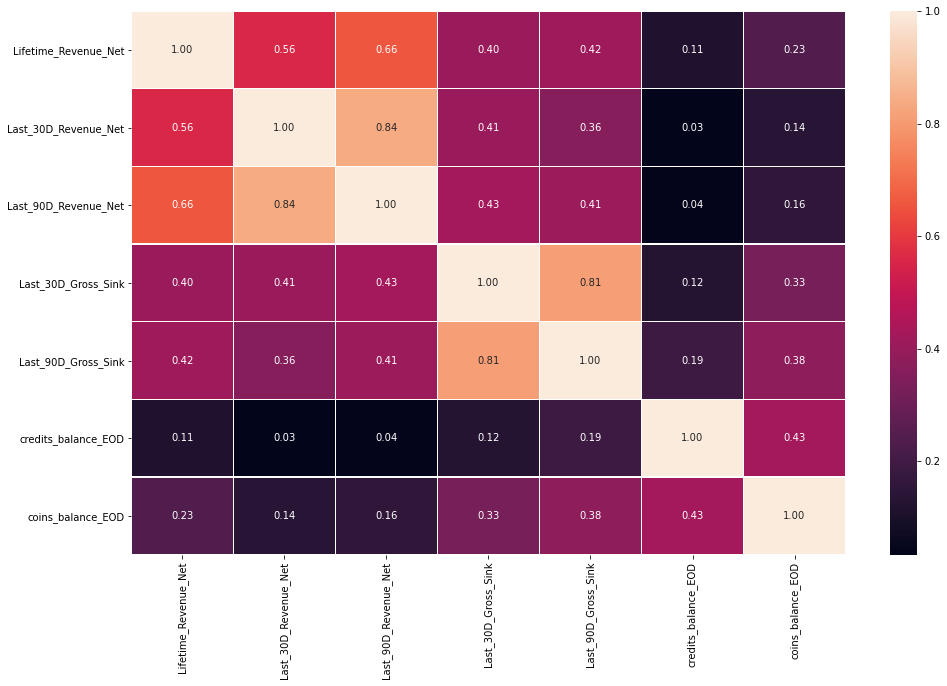

In [79]:
plt.figure(figsize = (16, 10))
sb.heatmap(correlations, 
           linewidths=.5, 
           xticklabels = cont_features, 
           yticklabels = cont_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

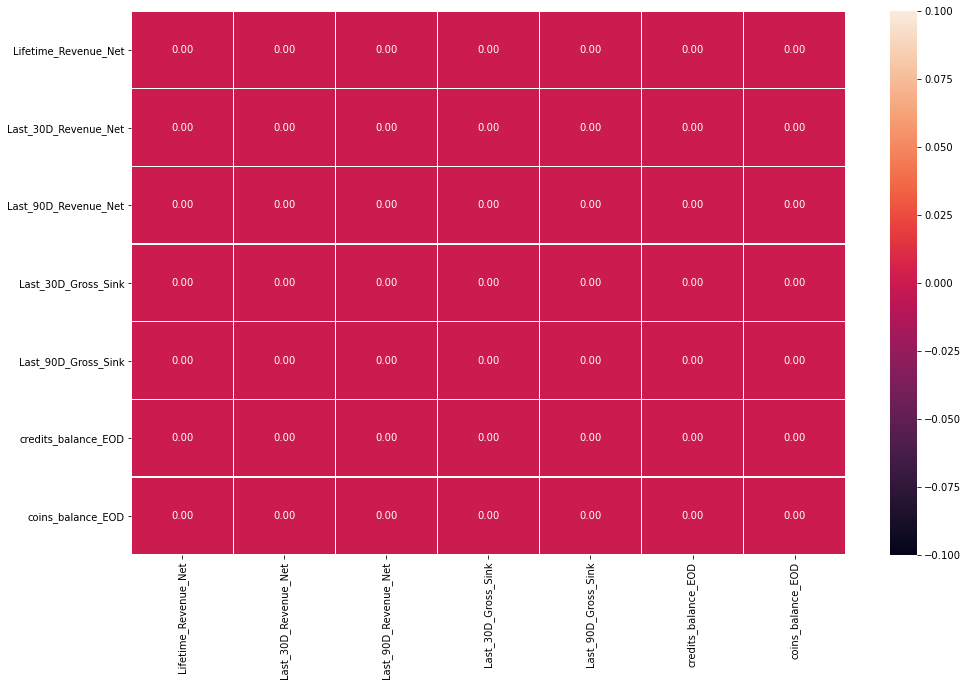

In [80]:
plt.figure(figsize = (16, 10))
sb.heatmap(p_values, 
           linewidths=.5, 
           xticklabels = cont_features, 
           yticklabels = cont_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

### Cross-correlations between the continous features 

In [17]:
cont_features = ['Lifetime_Revenue_Net', 'Last_30D_Revenue_Net', 'Last_90D_Revenue_Net', 'Last_30D_Gross_Sink', 'Last_90D_Gross_Sink', 'credits_balance_EOD', 'coins_balance_EOD']
print("There are overall {} features with continous values. They are:.".format(len(cont_features)))
for feat in cont_features:
    print(feat)

There are overall 7 features with continous values. They are:.
Lifetime_Revenue_Net
Last_30D_Revenue_Net
Last_90D_Revenue_Net
Last_30D_Gross_Sink
Last_90D_Gross_Sink
credits_balance_EOD
coins_balance_EOD


In [18]:
data_cont_features = data_for_clustering[cont_features]
data_cont_features.shape
data_cont_features.head()

,Lifetime_Revenue_Net,Last_30D_Revenue_Net,Last_90D_Revenue_Net,Last_30D_Gross_Sink,Last_90D_Gross_Sink,credits_balance_EOD,coins_balance_EOD
23899,0.0000,0.0,0.000,42.0,42.0,23992.0,989739.0
40151,0.0000,0.0,0.000,0.0,0.0,591.0,129887.0
40152,0.0000,0.0,0.000,16952.0,53355.0,279.0,485502.0
40153,85.1555,0.0,10.493,0.0,2652.0,2278.0,2863137.0
68592,110.9604,0.0,10.493,450.0,25135.0,5698.0,1277645.0


#### Pearson correlation
   
The data is required to be bi-variatly normal (that is, the data in each column is suppose to be normally distributed). This is not the case here, and so one shouldn't rely much on the results of this analysis. 


In [23]:
corr_pearson_cont_features = np.zeros([data_cont_features.shape[1], data_cont_features.shape[1]])
p_value_pearson_cont_features = np.zeros([data_cont_features.shape[1], data_cont_features.shape[1]])

for column_i in data_cont_features:
    i = data_cont_features.columns.get_loc(column_i)
    for column_j in data_cont_features:
        j = data_cont_features.columns.get_loc(column_j)
        r, p = stats.pearsonr(data_cont_features[column_i], data_cont_features[column_j])
        corr_pearson_cont_features[i][j] = r
        p_value_pearson_cont_features[i][j] = p

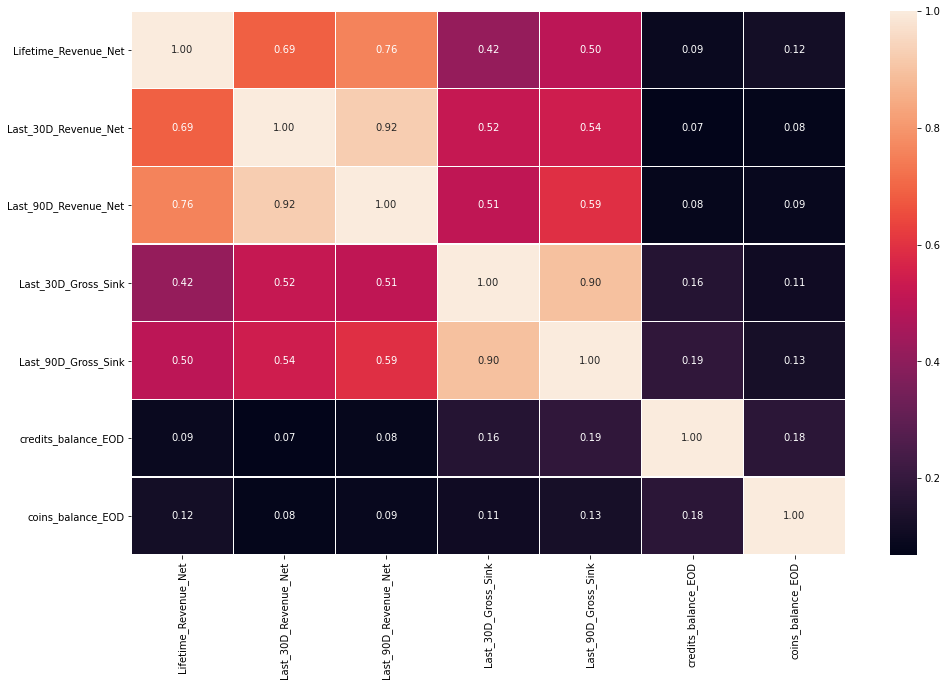

In [26]:
plt.figure(figsize = (16, 10))
sb.heatmap(corr_pearson_cont_features, 
           linewidths=.5, 
           xticklabels = cont_features, 
           yticklabels = cont_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

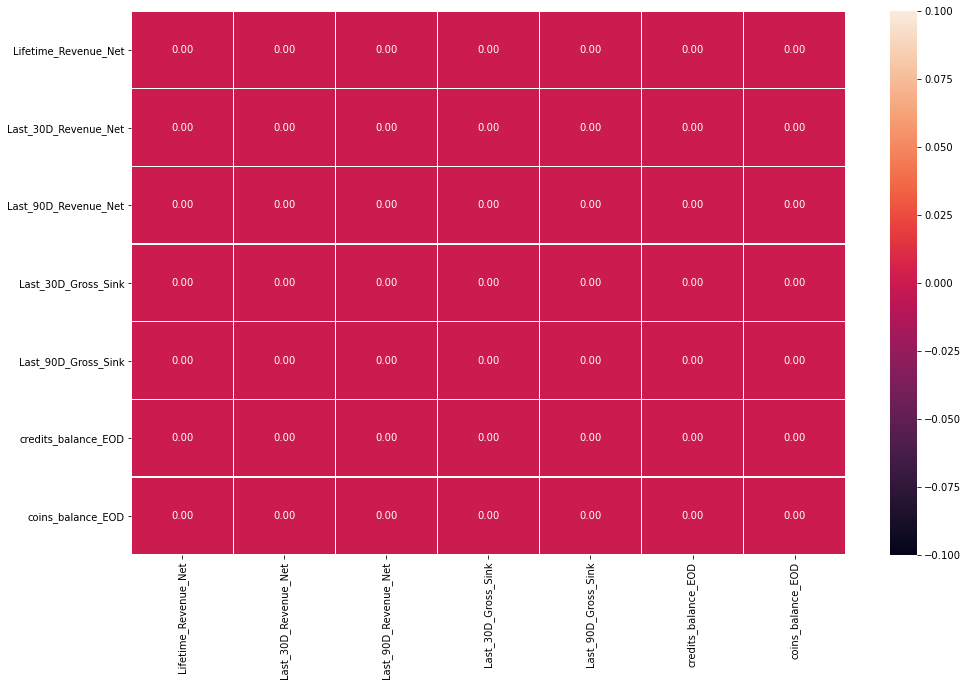

In [27]:
plt.figure(figsize = (16, 10))
sb.heatmap(p_value_pearson_cont_features, 
           linewidths=.5, 
           xticklabels = cont_features, 
           yticklabels = cont_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

While the correlation between each two features may vary between 0.9 to 0.08, it seems that all features are significantly correlated.    
It could be, though, that this is because of all the zero values that co-appear at these features (see the zeros analysis above). 

#### Spearman correlation
  
There is no requirement for the data to be normally distributed for the Spearman correlation. It is only required to be ordinal and the scores on one variable must be monotonically related to the other variable.

In [29]:
corr_spearman_cont_features = np.zeros([data_cont_features.shape[1], data_cont_features.shape[1]])
p_value_spearman_cont_features = np.zeros([data_cont_features.shape[1], data_cont_features.shape[1]])

for column_i in data_cont_features:
    i = data_cont_features.columns.get_loc(column_i)
    for column_j in data_cont_features:
        j = data_cont_features.columns.get_loc(column_j)
        r, p = stats.spearmanr(data_cont_features[column_i], data_cont_features[column_j])
        corr_spearman_cont_features[i][j] = r
        p_value_spearman_cont_features[i][j] = p

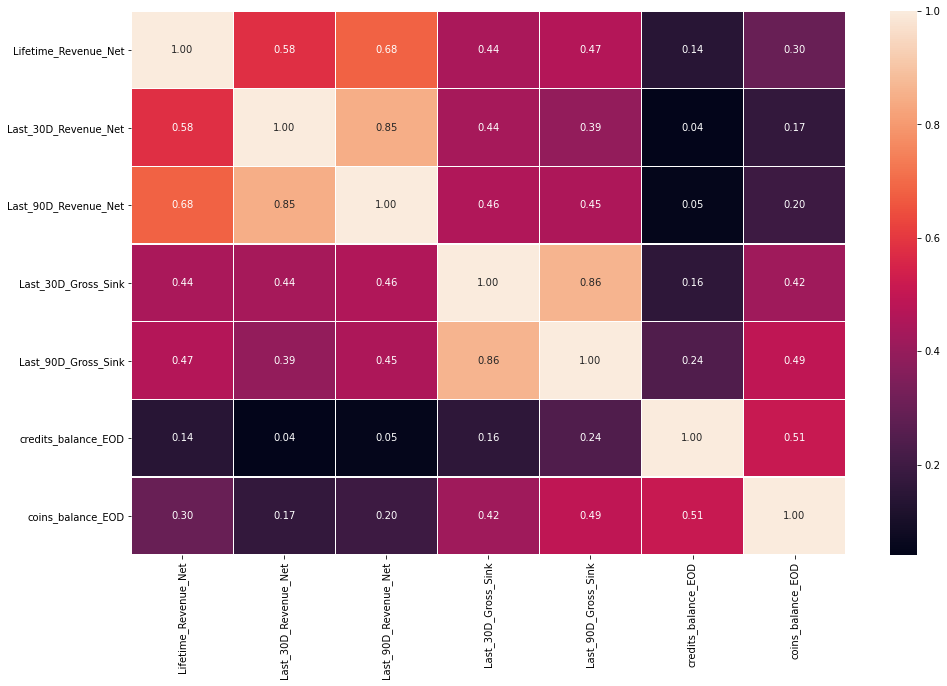

In [30]:
plt.figure(figsize = (16, 10))
sb.heatmap(corr_spearman_cont_features, 
           linewidths=.5, 
           xticklabels = cont_features, 
           yticklabels = cont_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

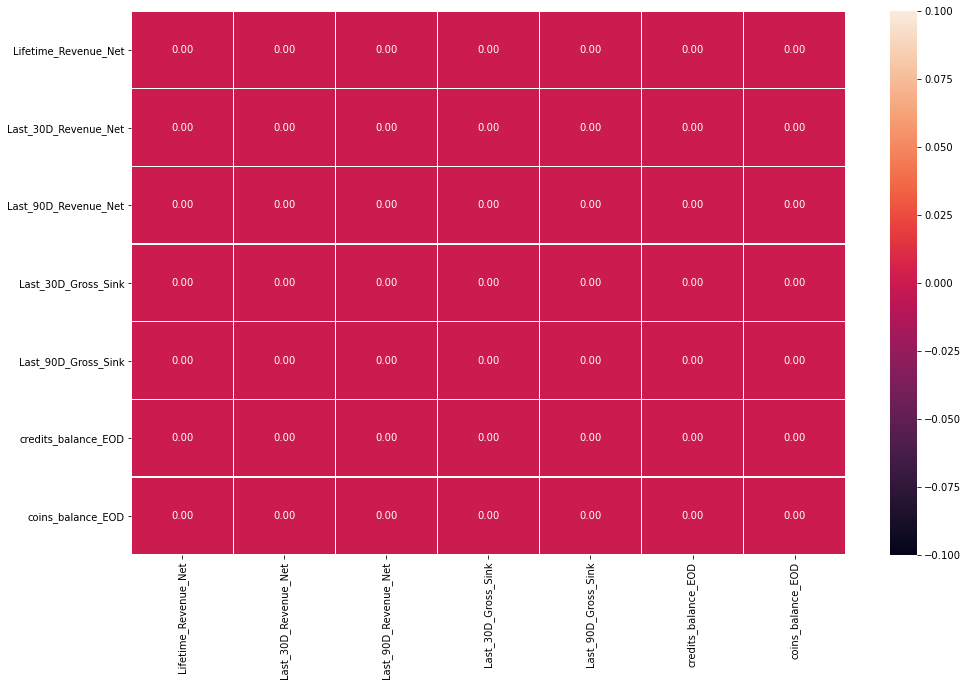

In [31]:
plt.figure(figsize = (16, 10))
sb.heatmap(p_value_spearman_cont_features, 
           linewidths=.5, 
           xticklabels = cont_features, 
           yticklabels = cont_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

Few of the Spearman correlations are higher than the Pearson, and few are lower. But still, all of the continous features are significantly correlated one with the other. 

#### Kendall-tau correlation 
  
Kendall's tau correlation coefficient is a nonparametric measure of the strength and direction of association that exists between two variables measured on at least an ordinal scale. It is considered a nonparametric alternative to the Pearson’s product-moment correlation when your data has failed one or more of the assumptions of this test (as in our case, the normality assumption). It is also considered an alternative to the nonparametric Spearman rank-order correlation coefficient (especially when you have a small sample size with many tied ranks). 

In our case, the data size is large, but still, let's run this test and see what the results are. 

In [32]:
corr_kendall_cont_features = np.zeros([data_cont_features.shape[1], data_cont_features.shape[1]])
p_value_kendall_cont_features = np.zeros([data_cont_features.shape[1], data_cont_features.shape[1]])

for column_i in data_cont_features:
    i = data_cont_features.columns.get_loc(column_i)
    for column_j in data_cont_features:
        j = data_cont_features.columns.get_loc(column_j)
        r, p = stats.kendalltau(data_cont_features[column_i], data_cont_features[column_j])
        corr_kendall_cont_features[i][j] = r
        p_value_kendall_cont_features[i][j] = p

/Users/alexanderloe/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


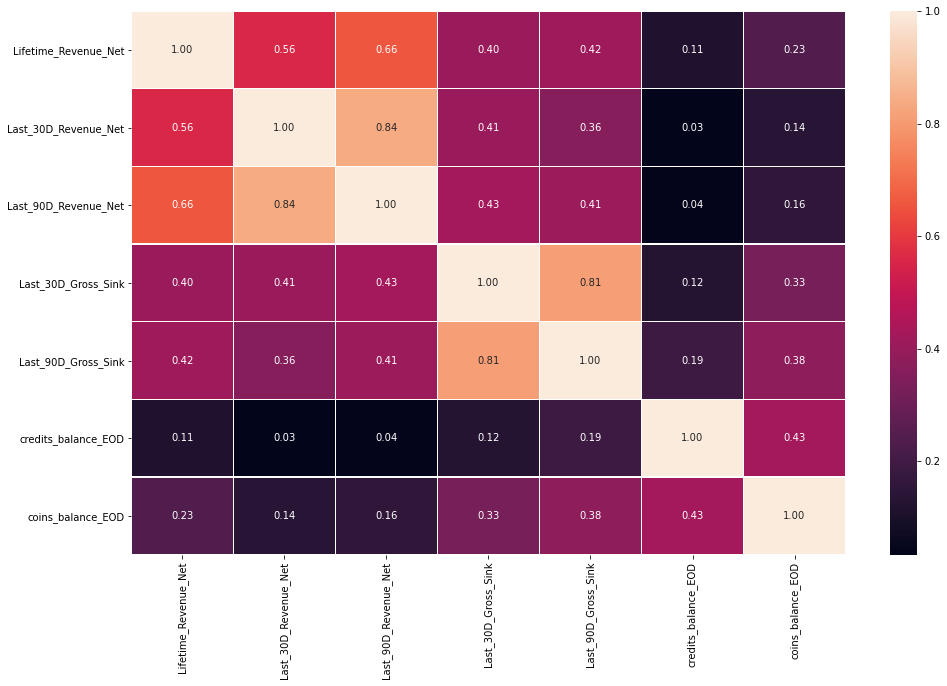

In [33]:
plt.figure(figsize = (16, 10))
sb.heatmap(corr_kendall_cont_features, 
           linewidths=.5, 
           xticklabels = cont_features, 
           yticklabels = cont_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

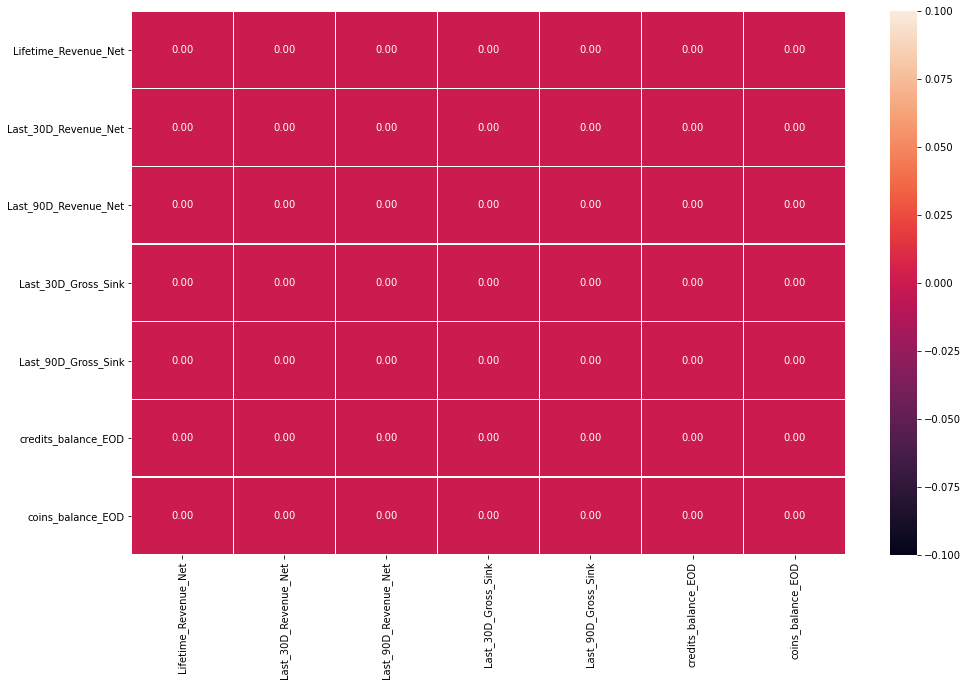

In [34]:
plt.figure(figsize = (16, 10))
sb.heatmap(p_value_kendall_cont_features, 
           linewidths=.5, 
           xticklabels = cont_features, 
           yticklabels = cont_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

As for the Pearson and Spearman, also all continous features are significantly correlated under the Kendall correlation. 

### Point bi-serial correlation between the binary features and the remaining features
  
  
[Here](https://statistics.laerd.com/spss-tutorials/point-biserial-correlation-using-spss-statistics.php) is some explanation of the point bi-serial test.   
In particular, it requires that the continuous variable should be approximately normally distributed for each category of the dichotomous variable. This can be tested using the Shapiro-Wilk test of normality.   
Also, it requires that the continuous variable have equal variances for each category of the dichotomous variable. This can be tested using Levene's test of equality of variances.
  
Importantly, and as always, if the requirements are not fulfilled, the results may not be valid. 

In [39]:
binary_features = ['is_elite', 'is_vip']
for_bi_serieal_features = cont_features + ['level', 'trstier', 'Last_30D_Transactions', 'Last_30D_Login_days', 'Last_90D_Login_days', 'number_of_bingo_rounds', 'Life_Time_Login_Days', 'total_rounds_mode_1', 'total_rounds_mode_6' ]

print(for_bi_serieal_features)

['Lifetime_Revenue_Net', 'Last_30D_Revenue_Net', 'Last_90D_Revenue_Net', 'Last_30D_Gross_Sink', 'Last_90D_Gross_Sink', 'credits_balance_EOD', 'coins_balance_EOD', 'level', 'trstier', 'Last_30D_Transactions', 'Last_30D_Login_days', 'Last_90D_Login_days', 'number_of_bingo_rounds', 'Life_Time_Login_Days', 'total_rounds_mode_1', 'total_rounds_mode_6']


In [42]:
data_binary_features = data_for_clustering[binary_features]
data_for_bi_serial_features = data_for_clustering[for_bi_serieal_features]
print(data_binary_features.shape)
print(data_for_bi_serial_features.shape)

(4985297, 2)
(4985297, 16)


In [44]:
corr_bi_serial = np.zeros([data_binary_features.shape[1], data_for_bi_serial_features.shape[1]])
p_value_bi_serial = np.zeros([data_binary_features.shape[1], data_for_bi_serial_features.shape[1]])

for column_i in data_binary_features:
    i = data_binary_features.columns.get_loc(column_i)
    for column_j in data_for_bi_serial_features:
        j = data_for_bi_serial_features.columns.get_loc(column_j)
        r, p = stats.pointbiserialr(data_binary_features[column_i], data_for_bi_serial_features[column_j])
        corr_bi_serial[i][j] = r
        p_value_bi_serial[i][j] = p

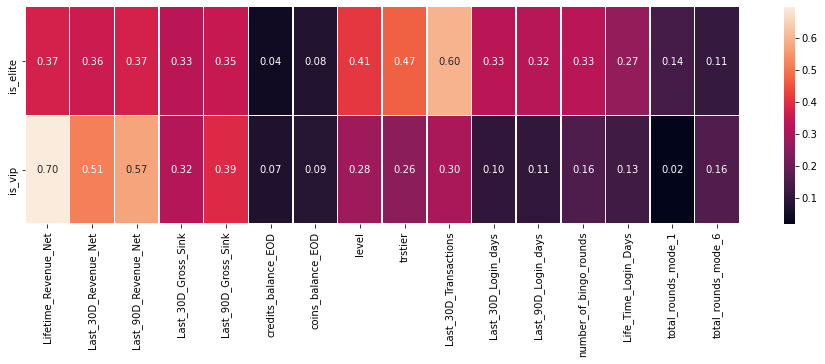

In [47]:
plt.figure(figsize = (16, 4))
sb.heatmap(corr_bi_serial, 
           linewidths=.5, 
           xticklabels = for_bi_serieal_features, 
           yticklabels = binary_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

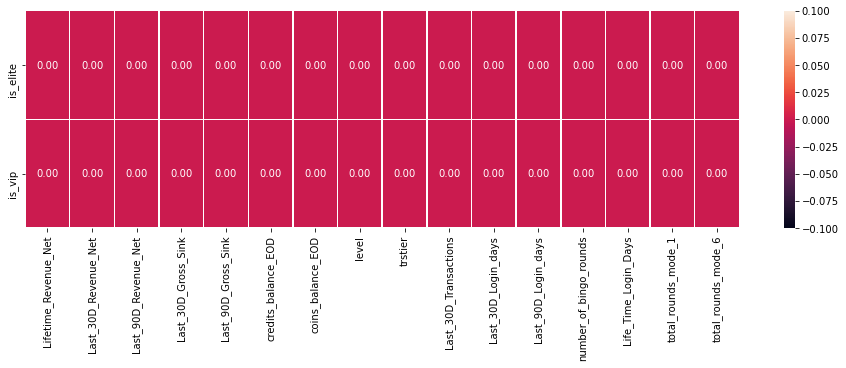

In [48]:
plt.figure(figsize = (16, 4))
sb.heatmap(p_value_bi_serial, 
           linewidths=.5, 
           xticklabels = for_bi_serieal_features, 
           yticklabels = binary_features, 
           annot=True,  
           fmt = ".2f")
plt.show()

The range of the Point Bi-Serial correlations between the binary 'is_elite' and 'is_vip' can be as high as 0.7 (vip status and life time revenue, which of course make sense), and as low as 0.02 (vip status and total rounds mode 1).  
Still, the correlations are significant for all relations. Here as well, I suspect that this is the case because of the large co-occurances of zeros in each column pair. 


#### Available user properties

- top_platform - categorical, 7 different categories. 
- level - discrete, from value of 1 to maximal level a user in a specific set achieved. 
- trstier - discrete, from 1 to 7. 
- level_bracket - discrete, from 1 to 10 (this is a discrete variable, and not categorical, as the different brackets are ordinal -> for example, bracket 'lv_40_79' is ordered before bracket 'lv_80_119')
- is_elite - binary 
- is_vip - binary 
- llrecency (the last time the user was seen) - discrete, from value of 1 to the maximal recency the data recorded 
- Lifetime_Revenue_Net - continous
- Last_30D_Revenue_Net - continous
- Last_90D_Revenue_Net - continous
- Last_30D_Transactions - discrete, from 0 to 30
- Last_30D_Gross_Sink - continous
- Last_90D_Gross_Sink - continous
- Last_30D_Login_days - discrete, from 0 to 30
- Last_90D_Login_days - discrete, from 0 to 90
- credits_balance_EOD - continous (it is in fact a discrete variable, but as it spans such a wide range of values, it can be considered as continous)
- coins_balance_EOD - continous (it is in fact a discrete variable, but as it spans such a wide range of values, it can be considered as continous)
- number_of_bingo_rounds - discrete, from 0 to 433
- Life_Time_Login_Days - discrete, from 1 to ca. 4000
- total_rounds_mode_1 - discrete, from 0 to ca. 300
- total_rounds_mode_2 - discrete, from 0 to ca. 300
- total_rounds_mode_3 - discrete, from 0 to ca. 300
- total_rounds_mode_4 - discrete, from 0 to ca. 300
- total_rounds_mode_5 - discrete, from 0 to ca. 300
- total_rounds_mode_6 - discrete, from 0 to ca. 300